In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('vader_lexicon')
#nltk.download('stopwords')

bar_colours = mcolors.TABLEAU_COLORS

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lazar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('realdonaldtrump.csv', sep=",")
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,501,879,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,33,271,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,12,20,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,10,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1373,1954,NaN,NaN


In [3]:
# pandas will treat 'date' column as a real date data type
df['date'] = pd.to_datetime(df['date'])

# check for an average of tweets per day
days = (df['date'].max() - df['date'].min()).days
print('Number of tweets: {}'.format(len(df)))
print('Published in {} days, which makes {:.1f} tweets per day'.format(days, len(df)/days))

Number of tweets: 42295
Published in 3999 days, which makes 10.6 tweets per day


In [4]:
# not really useful columns
df = df.drop(['id','link'],axis=1)
df.head()

,content,date,retweets,favorites,mentions,hashtags
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,501,879,NaN,NaN
1,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,33,271,NaN,NaN
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,12,20,NaN,NaN
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,10,26,NaN,NaN
4,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1373,1954,NaN,NaN


In [5]:
# see top retweeted posts
top_retweets = df.sort_values('retweets', ascending=False)
index = 0

for tweet in top_retweets.values[:10]:
    index += 1
    print("Best retweet count #{}: \n{} \n{} \t {} retweets \t {} favorites \n".format(index, tweet[0], tweet[1], tweet[2], tweet[3]))

Best retweet count #1: 
# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg 
2017-07-02 08:21:42 	 305708 retweets 	 522397 favorites 

Best retweet count #2: 
TODAY WE MAKE AMERICA GREAT AGAIN! 
2016-11-08 05:43:14 	 292786 retweets 	 514411 favorites 

Best retweet count #3: 
Are you allowed to impeach a president for gross incompetence? 
2014-06-04 05:23:11 	 244307 retweets 	 236729 favorites 

Best retweet count #4: 
A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP! 
2019-08-02 12:41:30 	 235542 retweets 	 846467 favorites 

Best retweet count #5: 
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen! 
2017-11-11 18:48:01 	 226148 retweets 	 553128 favorites 

Best retweet count #6: 
Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War

Text(0.5, 0, 'Year')

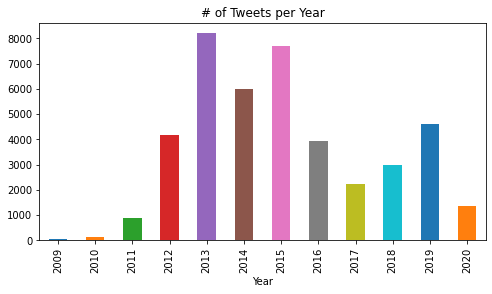

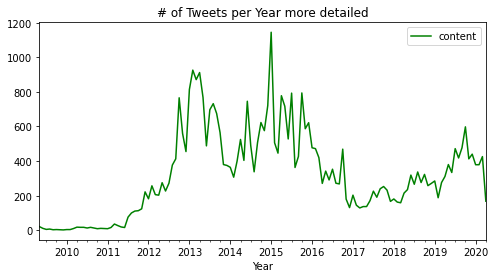

In [31]:
# the amount of tweets in each year
plt.figure(figsize=(8,4))
plt.title('# of Tweets per Year')
df['date'].groupby(df['date'].dt.year).count().plot(kind='bar', color=bar_colours)
plt.xlabel('Year')

df["year_month"] = df["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
df["year_month"] = pd.to_datetime(df["year_month"])
year_month = pd.pivot_table(df, values='content', index="year_month", aggfunc='count')
bar = year_month.plot(figsize=(8,4), color="green")
plt.title("# of Tweets per Year more detailed")
plt.xlabel('Year')

Text(0.5, 0, 'Day')

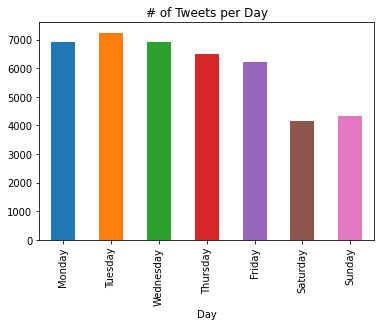

In [21]:
# amount of tweets on each day of the week
plt.title("# of Tweets per Day")
tweet_day = df["date"].groupby(df["date"].dt.day_name()).count()
tweet_day = tweet_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
tweet_day.plot(kind="bar", color=bar_colours)
plt.xlabel("Day")

In [8]:
# split data into different timeframes if needed 
president_time = df[df['date'] >= np.datetime64("2017-01-20")]
before_president = df[df['date'] < np.datetime64("2017-01-19")]
after_campaign = df[df['date'] >= np.datetime64("2015-06-01")]
before_campaign = df[df['date'] < np.datetime64("2015-05-31")]

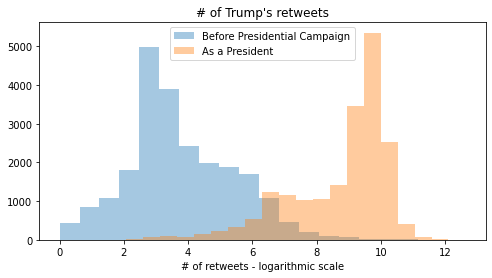

In [9]:
# check how retweets # changed in 2 different periods (pre-presidency, during presidency)
plt.figure(figsize=(8,4))
x1 = np.log(before_campaign['retweets']+1) # +1 so we don't have any 0 values
x2 = np.log(after_campaign['retweets']+1)

plt.title("# of Trump's retweets")
sns.distplot(x1, bins=20, label="Before Presidential Campaign", kde=False)
sns.distplot(x2, bins=20, label="As a President", kde=False)
plt.xlabel("# of retweets - logarithmic scale")
plt.legend()

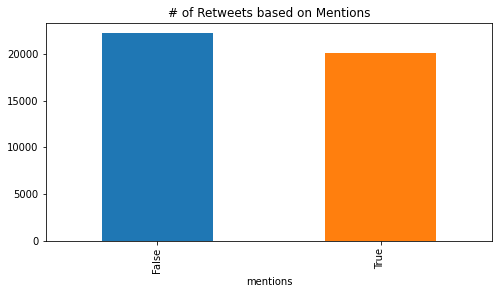

In [10]:
# are retweets affected by mentions?
plt.figure(figsize=(8,4))
plt.title('# of Retweets based on Mentions')
df['retweets'].groupby(df['mentions'].notnull()).count().plot(kind='bar', color=bar_colours)

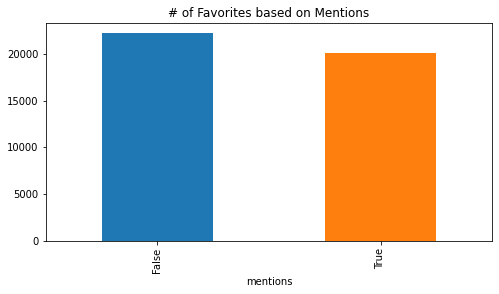

In [11]:
# are favorites affected by mentions?
plt.figure(figsize=(8,4))
plt.title('# of Favorites based on Mentions')
df['favorites'].groupby(df['mentions'].notnull()).count().plot(kind='bar', color=bar_colours)
plt.show()

Text(0.5, 0, 'Year')

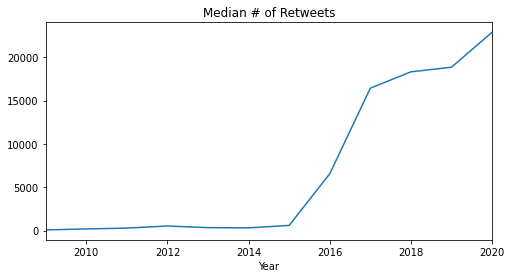

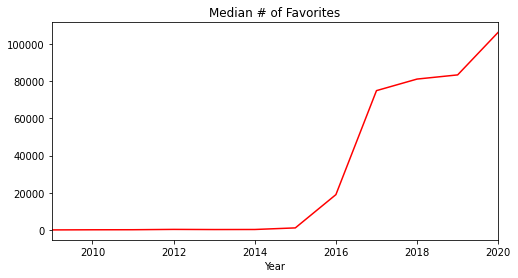

In [12]:
# see how the mean retweets & favorites changed over the years
plt.figure(figsize=(8,4))
df['retweets'].groupby(df['date'].dt.year).mean().plot()
plt.title("Median # of Retweets")
plt.xlabel('Year')

plt.figure(figsize=(8,4))
df['favorites'].groupby(df['date'].dt.year).mean().plot(color='r')
plt.title("Median # of Favorites")
plt.xlabel('Year')

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sw = ("realDonaldTrump","Donald Trump","and","twitter","com","http","www","Trump","Donald")
stop_words.extend(sw)
stop_words = set(stop_words)

# i've tried to add new stopwords in numerous ways but nothing worked

(-0.5, 799.5, 399.5, -0.5)

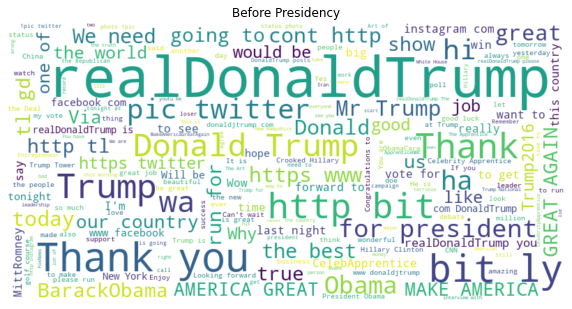

In [14]:
# a word cloud before Trump being elected
tweets = " ".join(word for word in before_president['content'])

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=800, height=400, max_font_size=80).generate(tweets)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Before Presidency')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

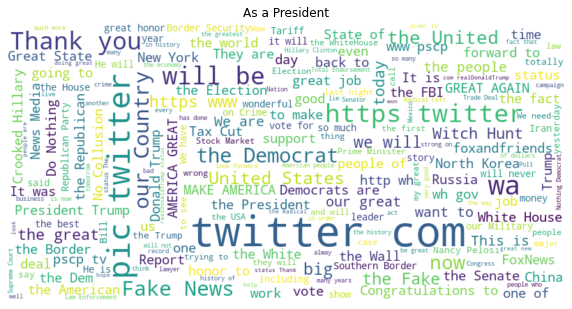

In [15]:
# word cloud during presidency
tweets= " ".join(word for word in president_time['content'])

wordcloud = WordCloud(background_color="white", width=800, height=400, max_font_size=60).generate(tweets)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('As a President')
plt.axis('off')

(-0.5, 859.5, 543.5, -0.5)

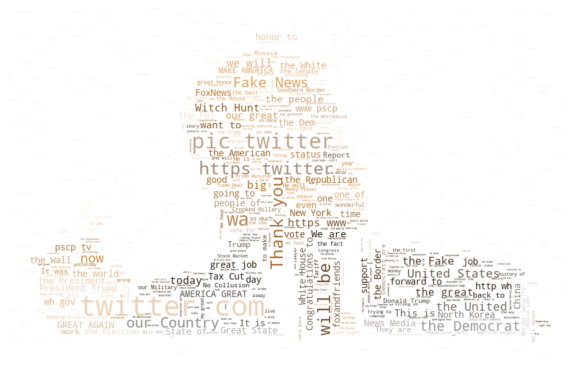

In [16]:
# something that I found on the internet and seemed nice to try - not particularly useful
trump_img = np.array(Image.open("trump-img.png"))
tweets= " ".join(word for word in president_time['content'])
wordcloud = WordCloud(background_color="white", max_words=10000, mask=trump_img)
wordcloud.generate(tweets)

image_colors=ImageColorGenerator(trump_img)
wordcloud.recolor(color_func=image_colors)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

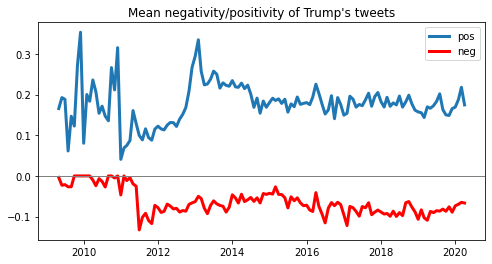

In [17]:
# sentiment analysis of Trump's tweets
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

df["polarity"] = df["content"].apply(lambda x: sentiment.polarity_scores(x))
df["pos"] = df["polarity"].apply(lambda x: x["pos"])
df["neg"] = df["polarity"].apply(lambda x: x["neg"])
df["compound"] = df["polarity"].apply(lambda x: x["compound"])

plt.figure(figsize=(8,4))
plt.title("Mean negativity/positivity of Trump's tweets")
year_month = pd.pivot_table(df, values="pos", index="year_month", aggfunc="mean")
plt.plot(year_month, lw=3)

year_month = pd.pivot_table(df, values="neg", index="year_month", aggfunc="mean").apply(lambda x: -x)
plt.plot(year_month, lw=3, color='r')
plt.axhline(y=0, lw=1, color='grey')
plt.legend(['pos','neg'])

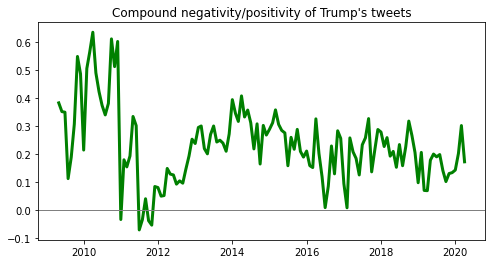

In [18]:
# compound sentiment analysis - he is quite positive
plt.figure(figsize=(8,4))
plt.title("Compound negativity/positivity of Trump's tweets")
year_month = pd.pivot_table(df, values="compound", index="year_month", aggfunc="mean")
plt.plot(year_month, lw=3, color="green")
plt.axhline(y=0, lw=1, color='grey')